Shape of the dataset: (7043, 21)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\602430644.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


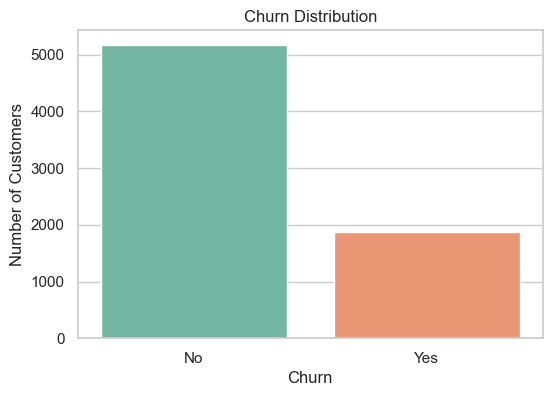

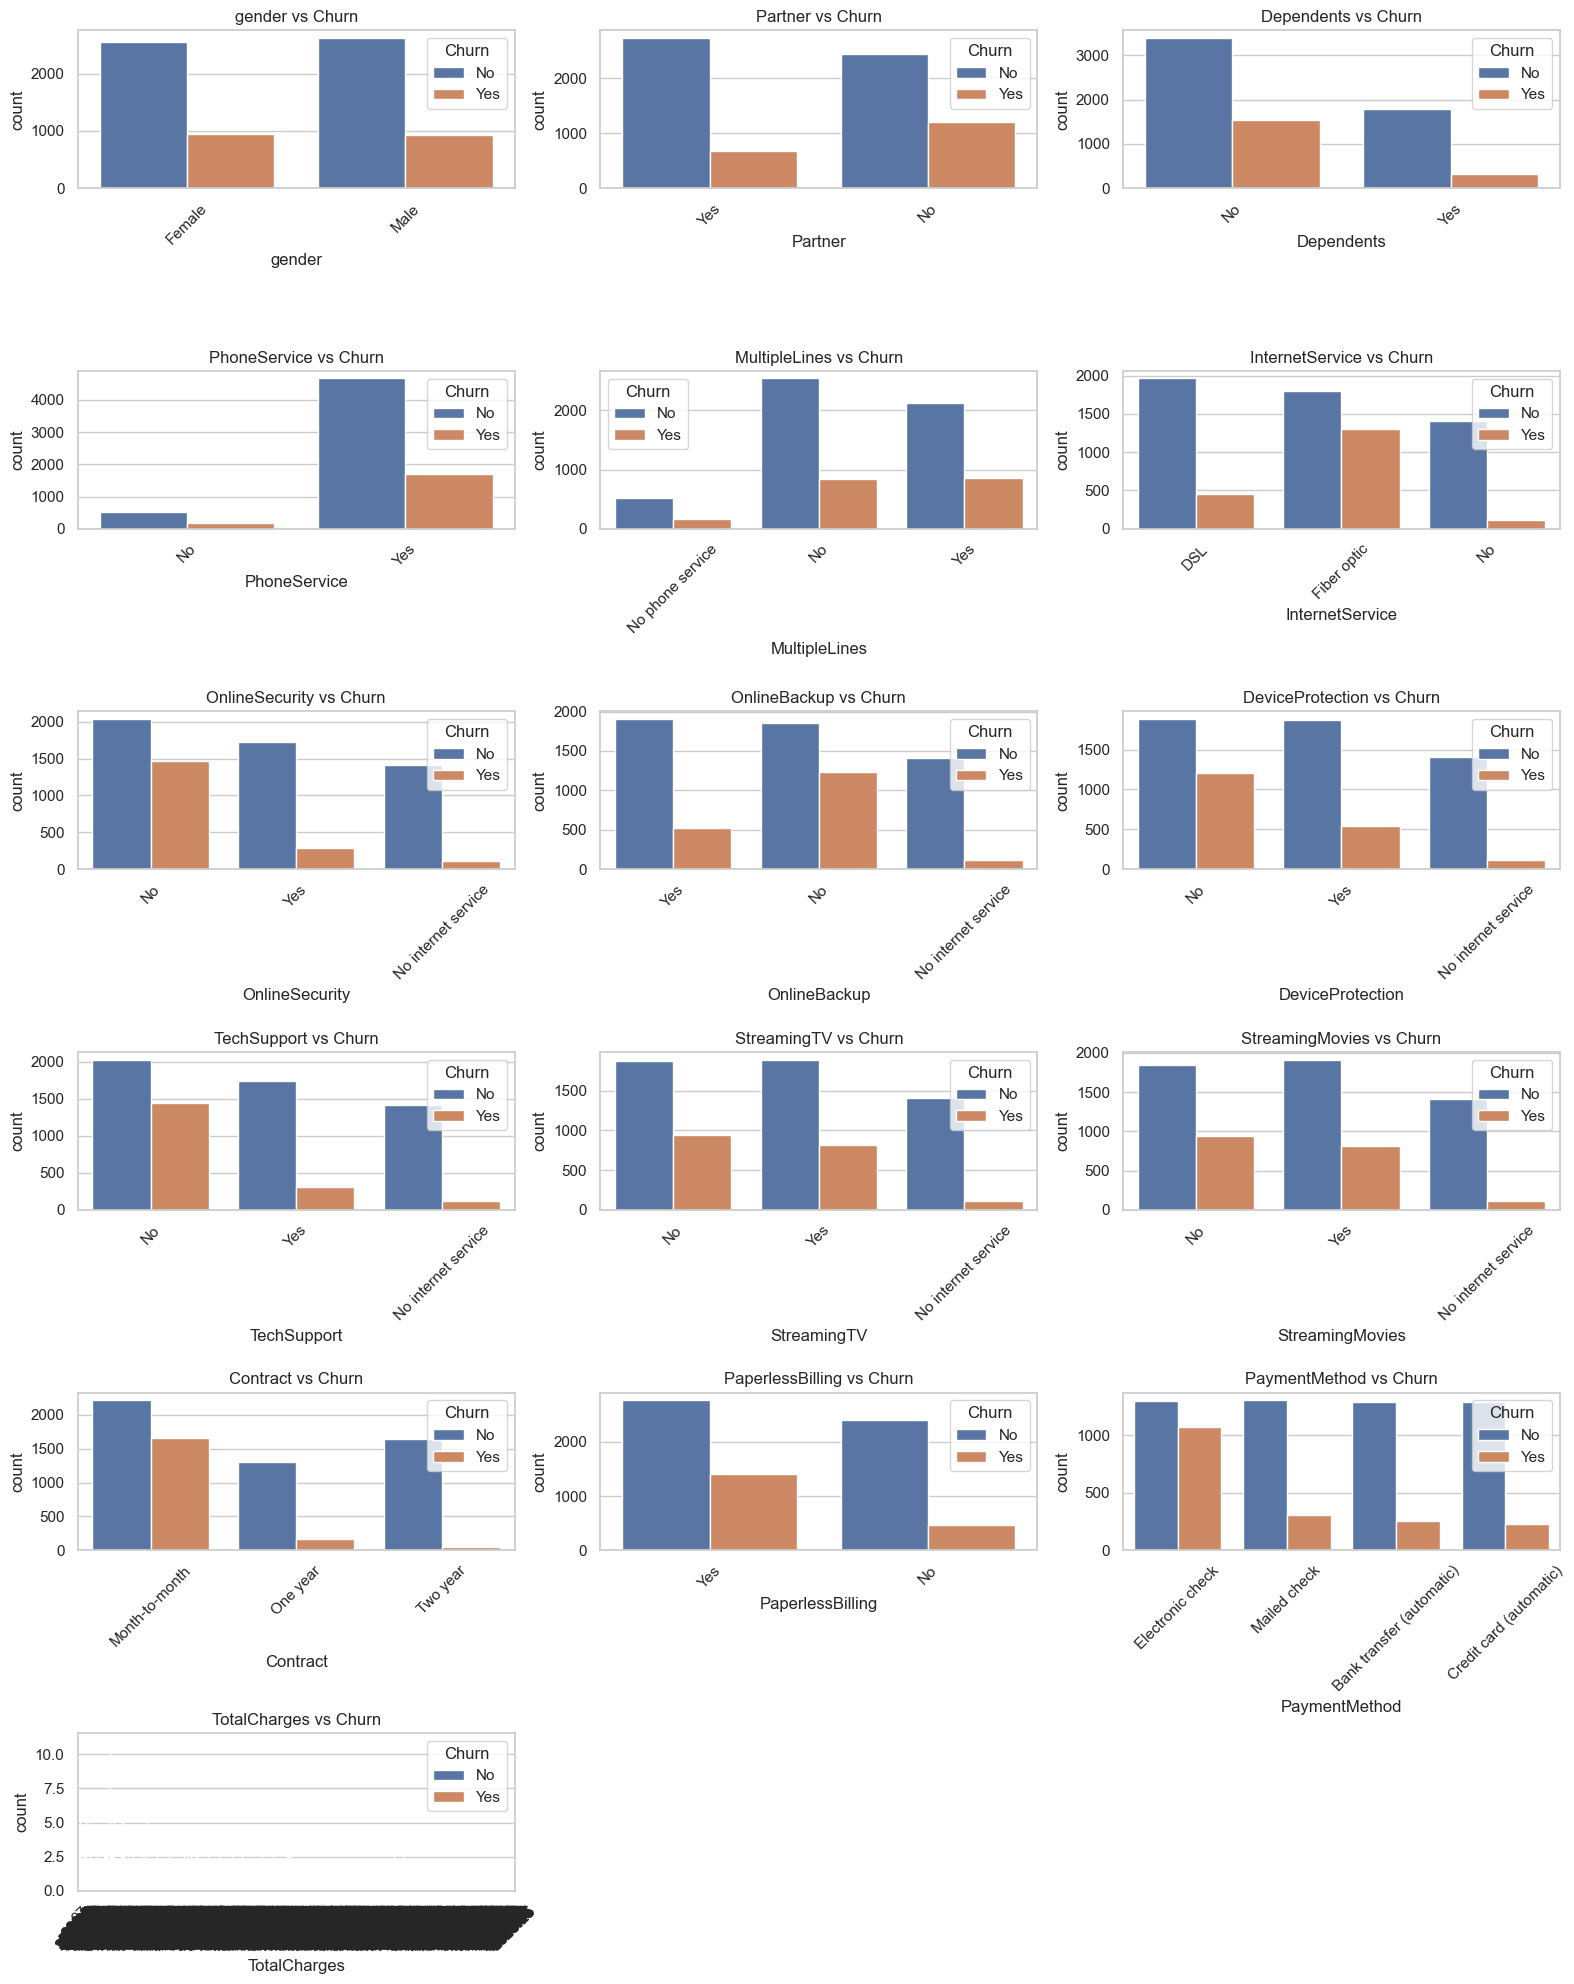

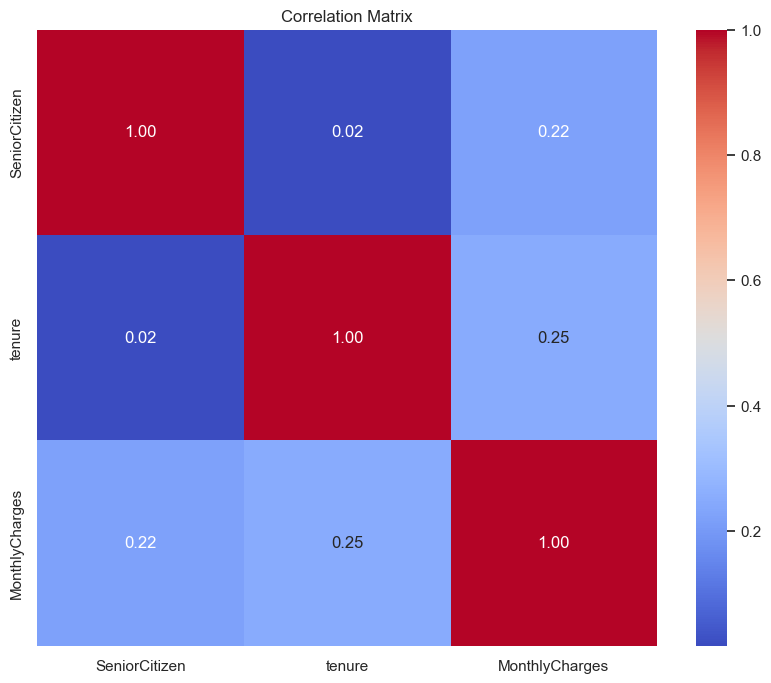

In [1]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Set plot styles
sns.set(style="whitegrid")  # This is enough
# to set the style for all plots
# 📂 Set the random seed for reproducibility

# 📁 Load the dataset
df = pd.read_csv(r"C:\Users\DELL\safaricom-churn-analysis\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
# 🏷️ Rename columns for easier access

# 👁️ Quick preview
df.head()

# 📊 Dataset summary
print("Shape of the dataset:", df.shape)
print("\nInfo:\n")
df.info()

# 🧼 Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

# 🔍 Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# 💠 Unique values in each column
print("\nUnique values:\n")
print(df.nunique())

# 🧠 Target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()

# 🧵 Categorical vs Churn
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'customerID' and col != 'Churn']

plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

# 🔢 Numerical analysis
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

# 📈 Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
